In [51]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
cares = pd.read_csv("../data/CARES_encoded.csv")
cares

,GENDER,RCRI score,Anemia category,PreopEGFRMDRD,DaysbetweenDeathandoperation,Preoptransfusionwithin30days,Intraop,Postopwithin30days,Transfusionintraandpostop,AnaestypeCategory,...,CHFRCRICategory,DMinsulinRCRICategory,CreatinineRCRICategory,GradeofKidneyCategory,RDW15.7,ASAcategorybinned,ICUAdmgt24h,Chinese,Indian,Malay
0,0,NaN,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,NaN,NaN,0.0,0,1,0,0
1,0,NaN,0.0,NaN,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,NaN,0.0,0.0,0,1,0,0
2,0,NaN,1.0,152.538570,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,0.0,0.0,0.0,0,1,0,0
3,1,NaN,2.0,117.231496,NaN,0.0,1.0,0.0,1.0,0,...,0,0,0,0.0,0.0,0.0,0,1,0,0
4,1,0.0,1.0,98.651255,59.0,0.0,0.0,0.0,0.0,0,...,0,0,0,0.0,1.0,1.0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
90780,0,2.0,1.0,48.339582,NaN,0.0,0.0,0.0,0.0,0,...,0,1,0,2.0,0.0,1.0,0,0,0,0
90781,1,1.0,2.0,126.592489,NaN,0.0,0.0,0.0,0.0,0,...,0,1,0,0.0,0.0,NaN,0,0,0,0
90782,0,NaN,0.0,86.306771,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,1.0,0.0,NaN,0,0,0,0
90783,0,0.0,NaN,NaN,NaN,0.0,0.0,0.0,0.0,0,...,0,0,0,NaN,NaN,1.0,0,1,0,0


Following what the papers say as "statistically significant"

In [3]:
cares.columns

Index(['GENDER', 'RCRI score', 'Anemia category', 'PreopEGFRMDRD',
       'DaysbetweenDeathandoperation', 'Preoptransfusionwithin30days',
       'Intraop', 'Postopwithin30days', 'Transfusionintraandpostop',
       'AnaestypeCategory', 'PriorityCategory',
       'TransfusionIntraandpostopCategory', 'AGEcategory', 'Mortality',
       'thirtydaymortality', 'SurgRiskCategory', 'CVARCRICategory',
       'IHDRCRICategory', 'CHFRCRICategory', 'DMinsulinRCRICategory',
       'CreatinineRCRICategory', 'GradeofKidneyCategory', 'RDW15.7',
       'ASAcategorybinned', 'ICUAdmgt24h', 'Chinese', 'Indian', 'Malay'],
      dtype='object')

In [25]:
# to predict days between death and op, assume that important columns for mortality are considered important for this
days_significant_columns = [
    'AGEcategory',
    'SurgRiskCategory',
    'Chinese',
    'Indian',
    'Malay',
    'Anemia category',
    'GradeofKidneyCategory',
    'RDW15.7',
    'CVARCRICategory',
    'IHDRCRICategory',
    'CHFRCRICategory',
    'DMinsulinRCRICategory',
    'ASAcategorybinned',
    'GENDER'
]

days_cares = cares[days_significant_columns + ['DaysbetweenDeathandoperation']]

In [26]:
days_cares = days_cares.dropna(how='any')

In [27]:
days_cares.shape

(4981, 15)

In [29]:
days_cares.head()

,AGEcategory,SurgRiskCategory,Chinese,Indian,Malay,Anemia category,GradeofKidneyCategory,RDW15.7,CVARCRICategory,IHDRCRICategory,CHFRCRICategory,DMinsulinRCRICategory,ASAcategorybinned,GENDER,DaysbetweenDeathandoperation
4,3,0,1,0,0,1.0,0.0,1.0,0,0,0,0,1.0,1,59.0
45,3,1,1,0,0,0.0,0.0,0.0,0,0,0,0,2.0,0,1063.0
103,5,0,0,0,1,1.0,0.0,0.0,0,0,0,0,1.0,0,793.0
107,2,1,1,0,0,1.0,0.0,1.0,0,0,0,0,2.0,1,17.0
108,4,1,1,0,0,2.0,0.0,0.0,0,0,0,0,2.0,0,433.0


In [30]:
days_cares["DaysbetweenDeathandoperation"].isna().value_counts()

False    4981
Name: DaysbetweenDeathandoperation, dtype: int64

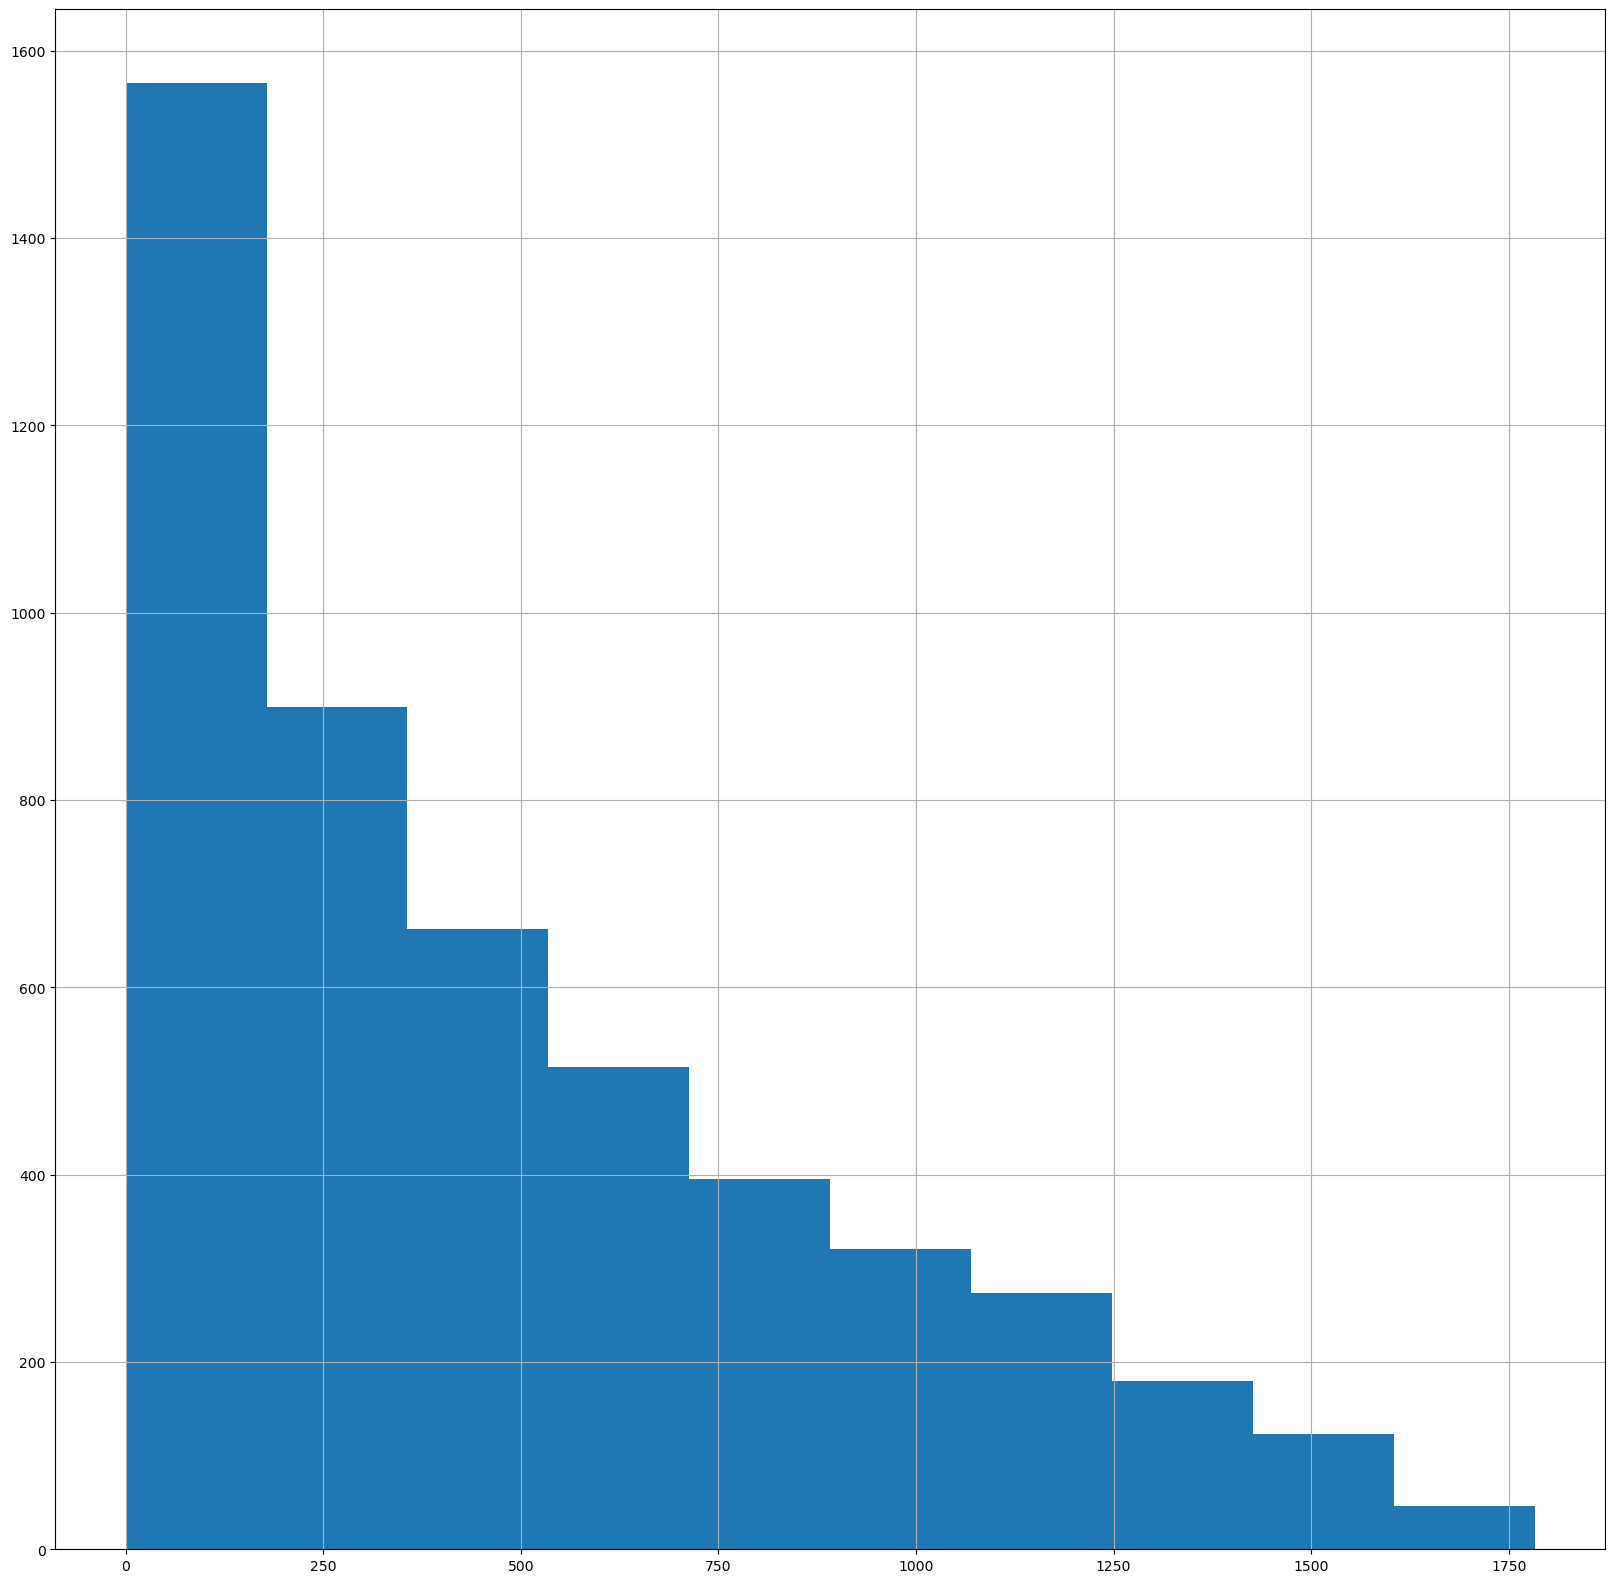

In [43]:
p = days_cares["DaysbetweenDeathandoperation"].hist(figsize=(20,20))

# Simple Modeling (lin reg, DT reg, ridge, lasso)

In [36]:
RANDOM_SEED = 623

In [37]:
np.random.seed(RANDOM_SEED)

In [65]:
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor # Import Decision Tree Classifier
from sklearn import tree, linear_model
from sklearn.linear_model import LinearRegression, Ridge, Lasso

from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [49]:
X = days_cares.drop('DaysbetweenDeathandoperation', axis=1)
y = days_cares['DaysbetweenDeathandoperation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=RANDOM_SEED)

In [58]:
# Check the shapes
print("Shape of X_test:", X_test.shape)
print("Shape of y_test:", y_test.shape)

Shape of X_test: (1495, 14)
Shape of y_test: (1495,)


In [69]:
# Define the models to evaluate
models = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(alpha=0.1),
    "Lasso Regression": Lasso(alpha=0.1),
    "Decision Tree Regression": DecisionTreeRegressor(random_state=42)
}

# Evaluate each model
for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)

    # Predict using the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_test, y_pred)

    # Print the evaluation results
    print(f"\n{name} Evaluation:")
    print(f"Intercept: {model.intercept_}" if hasattr(model, 'intercept_') else "")
    print(f"Coefficient: {model.coef_}" if hasattr(model, 'coef_') else "")
    print(f"Mean Absolute Error (MAE): {mae:.2f}")
    print(f"Mean Squared Error (MSE): {mse:.2f}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
    print(f"R-squared (R²): {r2:.2f}")


Linear Regression Evaluation:
Intercept: 741.0843930180405
Coefficient: [ -4.37911615 -28.04232974  18.15718515  44.19587575  11.42885946
 -62.84709105  38.13230676 -76.83676775  56.89457958 -70.15135556
 -71.36871878  -0.29868098 -99.63899115 -26.04667691]
Mean Absolute Error (MAE): 332.05
Mean Squared Error (MSE): 165105.83
Root Mean Squared Error (RMSE): 406.33
R-squared (R²): 0.05

Ridge Regression Evaluation:
Intercept: 741.1340415071248
Coefficient: [ -4.37883489 -28.04088753  18.09541098  44.11141674  11.36308385
 -62.84658292  38.1289235  -76.82974753  56.8549976  -70.13856352
 -71.32646942  -0.30112751 -99.63389806 -26.04408035]
Mean Absolute Error (MAE): 332.05
Mean Squared Error (MSE): 165105.05
Root Mean Squared Error (RMSE): 406.33
R-squared (R²): 0.05

Lasso Regression Evaluation:
Intercept: 749.1373307592312
Coefficient: [ -4.22942583 -27.80518054   8.98733543  33.47610538   1.40635908
 -62.7794682   37.96155642 -76.61294238  54.45658763 -69.66469745
 -69.13709149  -0. 

In [63]:
# Calculate evaluation metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

# Print evaluation metrics
print("Mean Absolute Error (MAE):", mae)
print("Mean Squared Error (MSE):", mse)
print("Root Mean Squared Error (RMSE):", rmse)
print("R-squared (R²):", r2)


Mean Absolute Error (MAE): 332.04818137263123
Mean Squared Error (MSE): 165105.8285970474
Root Mean Squared Error (RMSE): 406.3321653488035
R-squared (R²): 0.05053254409122643
